###**Решить задачу предсказания курса акций.**

**Бизнес-постанвока задачи**

Осуществить выборку по акциям СБЕРБАНКА(SBER) за период с 11.05.2017 - 09.06.2022 и произвести прогноз цены используя методы машинного обучения.

**Постановка задачи анализа данных**

Целью данной задачи является прогназирование стоимости цены акций СБЕРБАНКА(SBER) за определнный переиод. Набор данных состоит из: цены, цены открытия, максимальной цены, минимальной цены и изменение цены в процентах. Данные были взяты с сайта [investing.com](https://ru.investing.com/equities/sberbank_rts-historical-data)

**План анализа данных (data mining):**
1. Загрузить данные для обучения
2. Обработать данные перед обучением модели
3. Обучить модель на обучающей выборке
4. Загрузить и предобработать данные для тестирования
5. Провалидировать модель на тестовой выборке

###1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки**

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю. FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях. Поэтому такие предупреждения мы будем игнорировать. Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'. Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [209]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [210]:
import pandas as pd

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:

#/content/drive/MyDrive/deep_learning/sber_test_data.xlsx
#/content/drive/MyDrive/deep_learning/sber_training_data.xlsx

In [213]:
training_data = pd.read_excel('/content/drive/MyDrive/deep_learning/sber_training_data.xlsx')

In [214]:
training_data.head()

,Цена,Цена открытия,Максимальная цена,Минимальная цена,Изменение
0,118.41,120.0,120.09,117.7,-0.0124
1,118.41,120.0,120.09,117.7,-0.0124
2,118.41,120.0,120.09,117.7,-0.0124
3,118.41,120.0,120.09,117.7,-0.0124
4,118.41,120.0,120.09,117.7,-0.0124


In [215]:
training_data.shape

(1266, 5)

###2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

In [216]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена               1266 non-null   float64
 1   Цена открытия      1266 non-null   float64
 2   Максимальная цена  1266 non-null   float64
 3   Минимальная цена   1266 non-null   float64
 4   Изменение          1266 non-null   float64
dtypes: float64(5)
memory usage: 49.6 KB


**Шаг 2.2. Работаем с целевой переменной**

In [217]:
training_values = training_data['Цена']

In [218]:
training_values.head()

0    118.41
1    118.41
2    118.41
3    118.41
4    118.41
Name: Цена, dtype: float64

In [219]:
training_points = training_data.drop('Цена', axis=1)

In [220]:
training_points.head()

,Цена открытия,Максимальная цена,Минимальная цена,Изменение
0,120.0,120.09,117.7,-0.0124
1,120.0,120.09,117.7,-0.0124
2,120.0,120.09,117.7,-0.0124
3,120.0,120.09,117.7,-0.0124
4,120.0,120.09,117.7,-0.0124


In [221]:
training_points.shape

(1266, 4)

###3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

In [222]:
from sklearn import linear_model, ensemble

In [223]:
linear_regression_model = linear_model.LinearRegression()

In [224]:
random_forest_model = ensemble.RandomForestRegressor()

**Шаг 3.2. Обучить модель**

In [225]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [226]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

###4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

In [227]:
test_data = pd.read_excel('/content/drive/MyDrive/deep_learning/sber_test_data.xlsx')

In [228]:
test_data.head()

,Цена,Цена открытия,Максимальная цена,Минимальная цена,Изменение
0,118.41,120.0,120.09,117.7,-0.0124
1,118.41,120.0,120.09,117.7,-0.0124
2,118.41,120.0,120.09,117.7,-0.0124
3,118.41,120.0,120.09,117.7,-0.0124
4,118.41,120.0,120.09,117.7,-0.0124


In [229]:
test_data.shape

(1266, 5)

In [230]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена               1266 non-null   float64
 1   Цена открытия      1266 non-null   float64
 2   Максимальная цена  1266 non-null   float64
 3   Минимальная цена   1266 non-null   float64
 4   Изменение          1266 non-null   float64
dtypes: float64(5)
memory usage: 49.6 KB


**Шаг 4.2. Отделяем целевую переменную**

In [231]:
test_values = test_data['Цена']

In [232]:
test_points = test_data.drop('Цена', axis=1)

In [233]:
test_points.head()

,Цена открытия,Максимальная цена,Минимальная цена,Изменение
0,120.0,120.09,117.7,-0.0124
1,120.0,120.09,117.7,-0.0124
2,120.0,120.09,117.7,-0.0124
3,120.0,120.09,117.7,-0.0124
4,120.0,120.09,117.7,-0.0124


In [234]:
test_points.shape

(1266, 4)

###5. Провалидировать модель на тестовой выборке

**Шаг 5.1. Сравнение моделей.**

In [235]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [236]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [237]:
%matplotlib inline

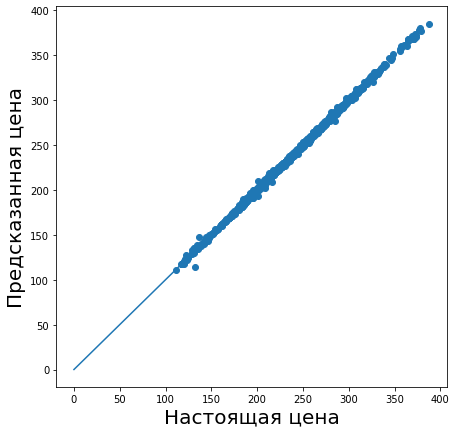

In [238]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 3 * 10**2], [0, 3 * 10**2]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

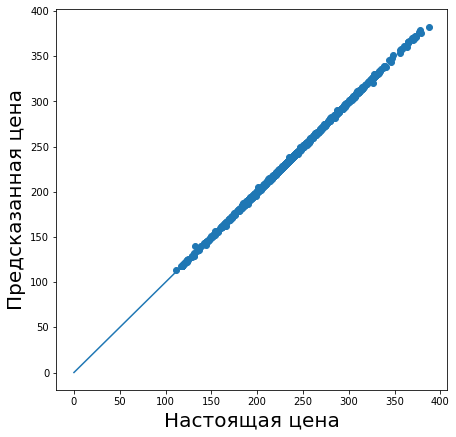

In [239]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 3 * 10**2], [0, 3 * 10**2])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [241]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [242]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

In [243]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model, 
       mean_squared_error_random_forest_model**(1/2)))

MAE:    0.97, RMSE:    1.50 для модели линейной регрессии
MAE:    0.46, RMSE:    0.75 для модели случайного леса


###6. Выявление важных признаков

In [244]:
random_forest_model.feature_importances_

array([0.00900149, 0.18267472, 0.8074952 , 0.00082859])

In [245]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

In [246]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

In [247]:
feature_importance

,Название признака,Важность признака
0,Цена открытия,0.009001
1,Максимальная цена,0.182675
2,Минимальная цена,0.807495
3,Изменение,0.000829


In [248]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Минимальная цена,0.807495
1,Максимальная цена,0.182675
0,Цена открытия,0.009001
3,Изменение,0.000829
